# Initial check Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Feature Modeling Libraries:

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Modelling libraries:

In [3]:
from sklearn.ensemble import RandomForestClassifier

## Model Evaluation libraries: 

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Load and initially clean data:

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
## read existing file
dataset = pd.read_csv('C:\\Users\\Ania\\Desktop\\Loan_Approval\\loan_approval_dataset.csv', sep= ",")

## get rid leading and trailing spaces from column names and drop 'loan_id' column
dataset.columns = dataset.columns.str.strip()
dataset = dataset.drop(columns='loan_id')
dataset.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Dataset Size:

In [7]:
dataset.shape

(4269, 12)

# List of columns:

In [8]:
dataset.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

# Data basic info:

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


# Detect duplicates

In [10]:
duplicates = dataset[dataset.duplicated()]
duplicates

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


# Check missing values:
##### note: decision trees can't work with null data, it has to be dropped 

In [11]:
dataset.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Data exploration and visualization
####  - in this setction I check what is the distribution between approved and rejected loans

In [12]:
dataset['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

<Axes: >

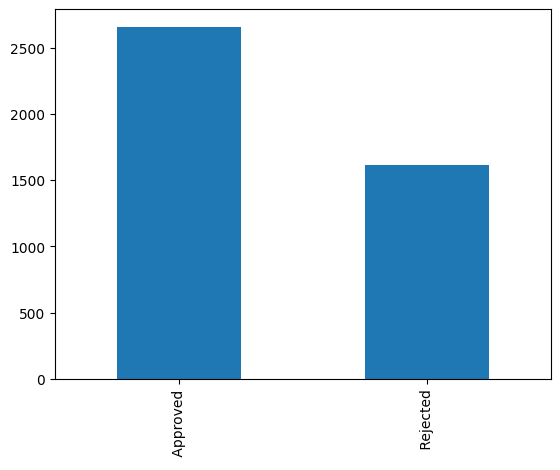

In [13]:
dataset['loan_status'].value_counts().plot(kind='bar')

# Impact of selected variables on loan decision:
### I take 'self_employed', 'education', and 'loan_term':
##### note: take only columns that have few categories or values, otherwise it is not useful, e.g. here: self_employed : yes/no, education: Graduate/ Not Graduate, loan_term (only few terms)

<Axes: xlabel='self_employed'>

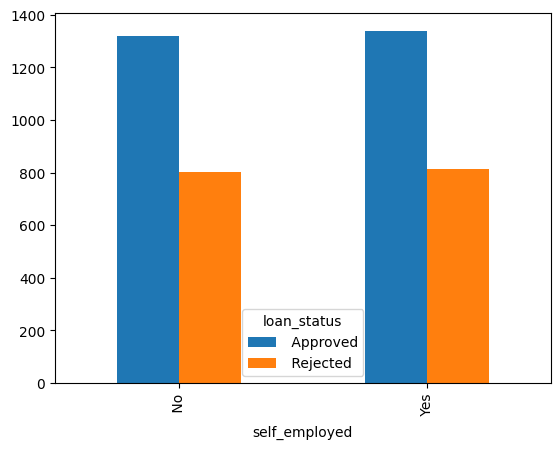

In [14]:
self_employed_factor = pd.crosstab(dataset.self_employed, dataset.loan_status).plot(kind='bar')
self_employed_factor

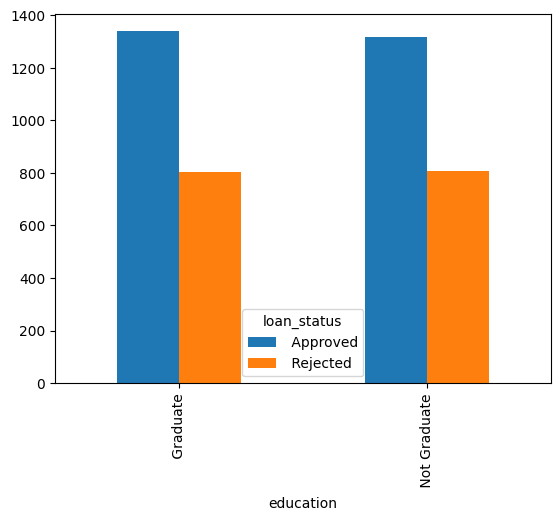

In [15]:
education_factor = pd.crosstab(dataset.education, dataset.loan_status).plot(kind='bar')

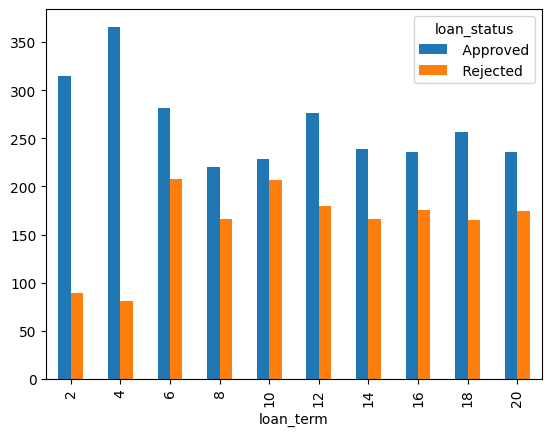

In [16]:
loan_term_factor = pd.crosstab(dataset.loan_term, dataset.loan_status).plot(kind='bar')

# Distribution of numerical columns, which are ints and which floats:
##### note: decision trees only take numerical columns, therefore all categorical columns like here e.g. self_employed: yes/no, or loan_status: approved/ rejected, or for example company departments should changed into numerical variables

In [17]:
int_lst = dataset.select_dtypes(include='int').columns.tolist()
int_lst

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [18]:
float_lst = dataset.select_dtypes(include='float').columns.tolist()
float_lst

[]

In [19]:
numerical_columns_lst= ['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

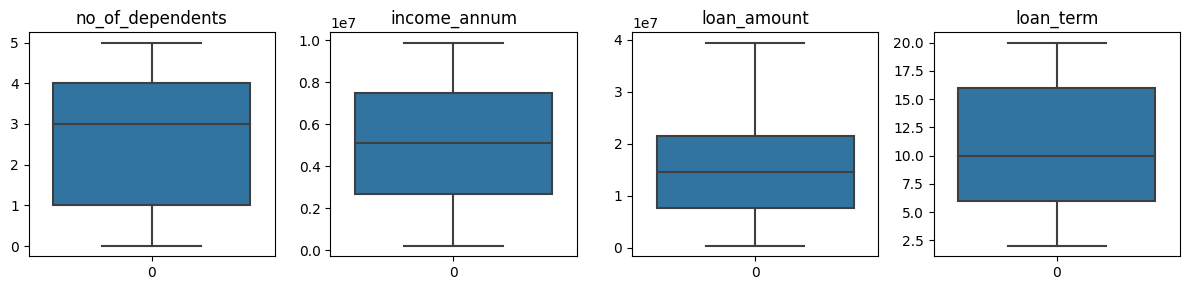

In [20]:
# zobaczyć jak seaboorn opisuje box plot

fig, axes = plt.subplots(ncols=4, figsize=(12,3))
for column, axis in zip(numerical_columns_lst[1:5], axes):
    sns.boxplot(data=dataset[column], ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

## Feature Engineering:
#### Converting categorical Features into Numerical, e.g. self_employed - yes/ no into 0,1

In [21]:
label_encoder = LabelEncoder()

In [22]:
dataset['education'] = label_encoder.fit_transform(dataset['education'])
dataset['self_employed'] = label_encoder.fit_transform(dataset['self_employed'])
dataset['loan_status'] = label_encoder.fit_transform(dataset['loan_status'])
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


## Dependent (Target) and independent Variable:

In [23]:
# x = drop column loan_status
X = dataset.drop('loan_status', axis=1)

# y = only loan_status data
y = dataset['loan_status']

## Split data into Training an Testing:
#### Creating dependent and independent train and test sets

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #doczytać, zapewnia, że zawsze są te same liczby losowe wzięte do analizy.

## Feature Scalling:

In [25]:
standard_scaler = StandardScaler()

In [26]:
xtrain_scaled = standard_scaler.fit_transform(x_train) #ogarnąć różnicę
xtest_scaled = standard_scaler.transform(x_test) #ogarnąc różnicę

In [27]:
xtest_scaled

array([[ 1.51250774, -0.99736803, -1.01504731, ...,  1.15447134,
         0.05627784,  0.72735662],
       [-0.25599737, -0.99736803, -1.01504731, ...,  1.04007205,
         0.28522978,  0.54176071],
       [ 0.33350433, -0.99736803, -1.01504731, ...,  2.57302245,
         1.45179448,  0.51082806],
       ...,
       [ 1.51250774,  1.00263891,  0.98517575, ...,  0.49095549,
        -0.37982112,  0.88201987],
       [ 0.92300603,  1.00263891, -1.01504731, ..., -0.83607619,
        -1.0121646 , -1.09766982],
       [-0.84549907,  1.00263891, -1.01504731, ...,  0.14775765,
        -0.59787059, -0.97393921]])

## Random Forest Model:
##### note: RandomModelClassifier() is used for classification of tasks, where the goal is to predict discrete labels (e.g., categories or classes), meaning: if get loan or not, if email is spam or not, predict category of an image, etc.
##### note: there is also RandomForestRegressor, which is used for regression tasks, where the goal is to predict continous values  (e.g., prices, temperatures).

In [28]:
random_forest_model = RandomForestClassifier()

## Model Training:

In [29]:
random_forest_model.fit(xtrain_scaled, y_train)

RandomForestClassifier()

In [30]:
y_pred = random_forest_model.predict(xtest_scaled)
y_pred[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

## Model Evaluation:
##### note: te confusion_matrix is used to evaluate performance of a classification model. It compares atual outcomes of test df with predicted outcomes. It helps to see number of correct predicions along with errors made by model - doczytać te 7, czy to są approvale czy odmowy??

In [31]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[529   7]
 [ 13 305]]


<Axes: >

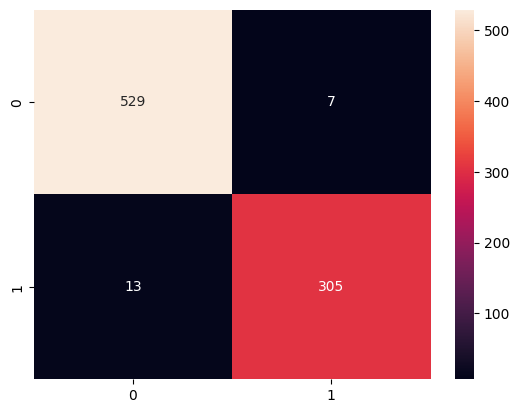

In [32]:
sns.heatmap(confusion_matrix, annot=True, fmt='d')

## Accuracy:

#### measures the proportion of all correct predictions (both positives and negatives) among the total number of cases. Use accuracy when the classes in my dataset are well-balanced. It gives a good overall measure of correctness.
#### accuracy = (True Positives(TP) + True Negatives(TN)) / total number of samples

#### note: when we compare atuals (y_test) to predictions (y_pred) for loan example:
###### True Positive: Actual (approved), Predicted (approved) - ok
###### True Negavite: Actual (rejected), Predicted (rejected) - ok
###### False Positive: Actual (rejected), Predicted (approved) - not ok
###### False Negative: Actual (approved), predicted (rejected) - not ok


In [33]:
model_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', model_accuracy)

Accuracy of the model: 0.9765807962529274


## Precission:
#### measures the proportion of true positive predictions out of all positive predictions made by the model. Use precision when I need to be confident that positive predictions are correct, such as in fraud detection where false positives (falsely flagged transactions) are costly.
#### precission = True Positives(TP) / (True Positives(TP) + False Positives(FP))

In [34]:
model_precision = precision_score(y_test, y_pred)
print('Precision of the model:', model_precision)

Precision of the model: 0.9775641025641025


## Recall:
#### also sensitivity: measures the proportion of true positive predictions out of all actual positive cases. It indicates how well the model captures positive instances. Use it when it is important to identify all possitive instances.
#### recall = True Positives(TP) / True Positives(TP) + False Negative(FP)

In [35]:
model_recall = recall_score(y_test, y_pred)
print('Recall of the model:', model_recall)

Recall of the model: 0.9591194968553459


## F1-Score:
#### Tmean of precision and recall, providing a balance between the two. It is particularly useful when I need a balance between precision and recall. Serves well for imbalanced datasets, where one class (e.g. loan - rejected) is represented more often. 
#### F1-score = 2 x (Precission x Recall) / (Precission + Recall)

In [36]:
f1_score = f1_score(y_test, y_pred)
print('F1-score of the model:', model_recall)

F1-score of the model: 0.9591194968553459


## Classification Report:

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



## Feature Importance Matrix in Random Forecast:
### in this task I check which of features are the most impactful to the model

In [48]:
score_lst = random_forest_model.feature_importances_
list_of_features = list(X.columns)
score_df= pd.DataFrame({'Feature': list_of_features, 'Score': score_lst})
score_df.sort_values(by='Score', ascending=False)

,Feature,Score
6,cibil_score,0.815140
5,loan_term,0.059694
4,loan_amount,0.029379
3,income_annum,0.017762
7,residential_assets_value,0.017210
9,luxury_assets_value,0.017042
8,commercial_assets_value,0.016231
10,bank_asset_value,0.014750
0,no_of_dependents,0.007951
2,self_employed,0.002525


<Axes: xlabel='Score', ylabel='Feature'>

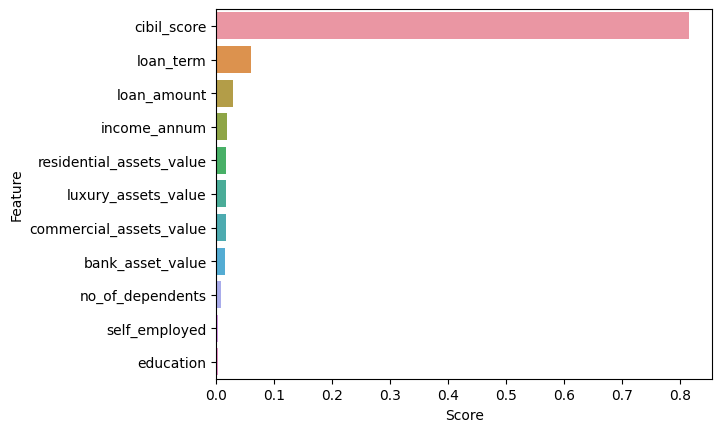

In [55]:
sns.barplot(data=score_df.sort_values(by='Score', ascending=False), y='Feature', x='Score', orient='h')

### k-fold Cross Validation:

In [40]:
scores = cross_val_score(random_forest_model, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:', scores)

Cross-validation scores: [0.9795022  0.97510981 0.97657394 0.97803807 0.9795022 ]


In [41]:
avg_model_score = scores.mean()
print('Average Model Score:', avg_model_score)

Average Model Score: 0.9777452415812592


## Hyperparameter Tuning:
### # Grid search | Random Search:

In [42]:
parameters = {
    'n_estimators': [50,100],
    'max_features': ['sqrt', 'log2', None]
}

### Search the best parameters:

In [43]:
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=parameters)

In [44]:
grid_search.fit(xtrain_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

### Building NEW model with best parameters

In [45]:
random_forest_model_new = RandomForestClassifier(max_features='log2', n_estimators=50)

In [46]:
random_forest_model_new.fit(xtrain_scaled, y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

### Average Accuracy Score for Cross Validation:

In [47]:
avg_model_score = scores.mean()
print('Average Model Score:', avg_model_score)

Average Model Score: 0.9777452415812592


<Axes: xlabel='Score', ylabel='Feature'>

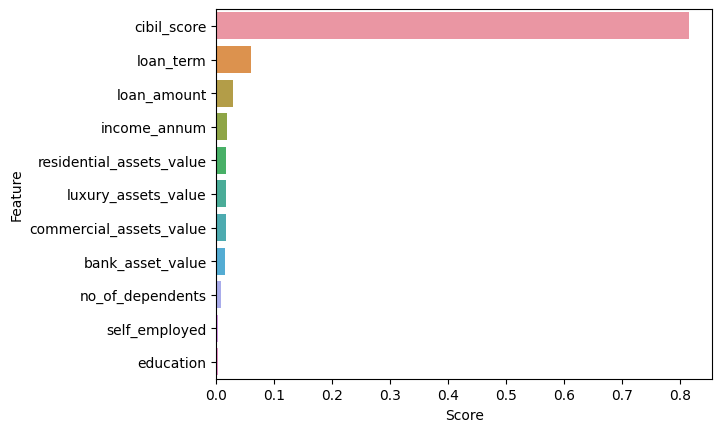

In [54]:
### doczytać w dokumentacji, czy jak robię random forest nie ma grid_search, dopisać wnioski po swojemu do każdego etapu !!!